In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [5]:
df.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


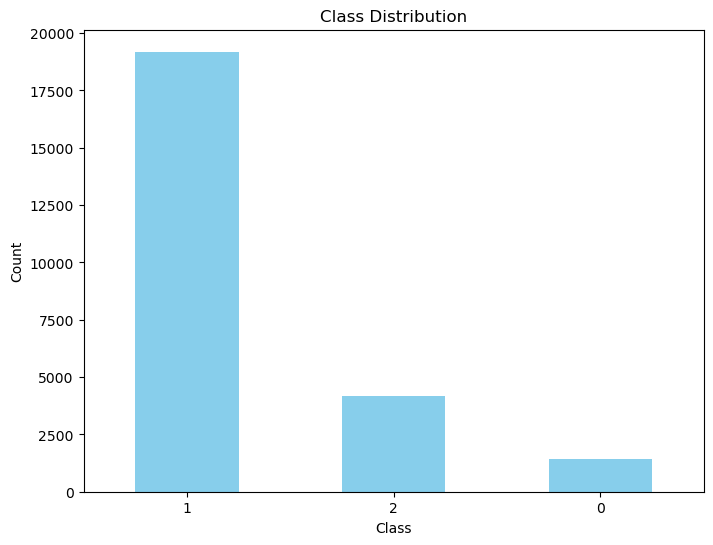

In [6]:
plt.figure(figsize=(8, 6))
df['class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


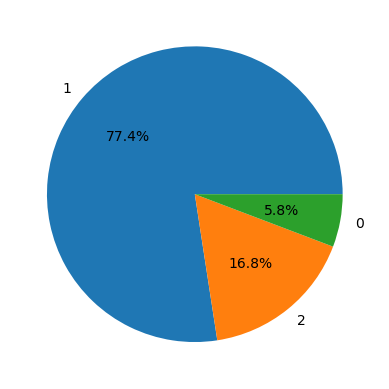

In [7]:
import matplotlib.pyplot as plt
plt.pie(df['class'].value_counts().values,
		labels = df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


In [8]:
# Balancing the dataset
class_2 = df[df['class'] == 2]
class_1 = df[df['class'] == 1].sample(n=8000)
class_0 = df[df['class'] == 0]

In [9]:
balanced_df = pd.concat([class_0, class_0, class_0, class_0, class_0, class_1, class_2, class_2], axis=0)

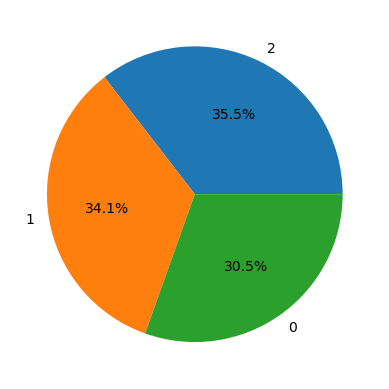

In [10]:
plt.pie(balanced_df['class'].value_counts().values,
		labels=balanced_df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


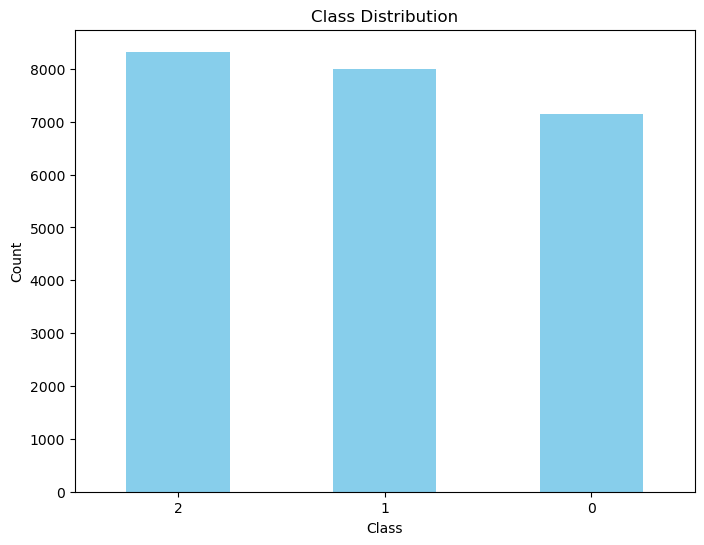

In [11]:
plt.figure(figsize=(8, 6))
balanced_df['class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [12]:
balanced_df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
85,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,3,2,1,0,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."


In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
lemmatizer = WordNetLemmatizer()
def preprocess_tweet(text):
    cleaned_text = re.sub(r'@[A-Za-z0-9_]+|https?://[A-Za-z0-9./]+|[^a-zA-Z]', ' ', text)
    cleaned_text = cleaned_text.lower()
    tokens = word_tokenize(cleaned_text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    processed_text = ' '.join(tokens)
    return processed_text

In [14]:
balanced_df['processed_tweet'] = balanced_df['tweet'].apply(preprocess_tweet)

In [15]:
balanced_df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,processed_tweet
85,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",queer gaywad
89,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",alsarabsss he beaner smh tell he mexican
110,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",fucking gay blacklisted hoe holding tehgodclan...
184,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",lmfaoooo hate black people black people nigger
202,3,2,1,0,0,"""@NoChillPaz: ""At least I'm not a nigger"" http...",least nigger lmfao


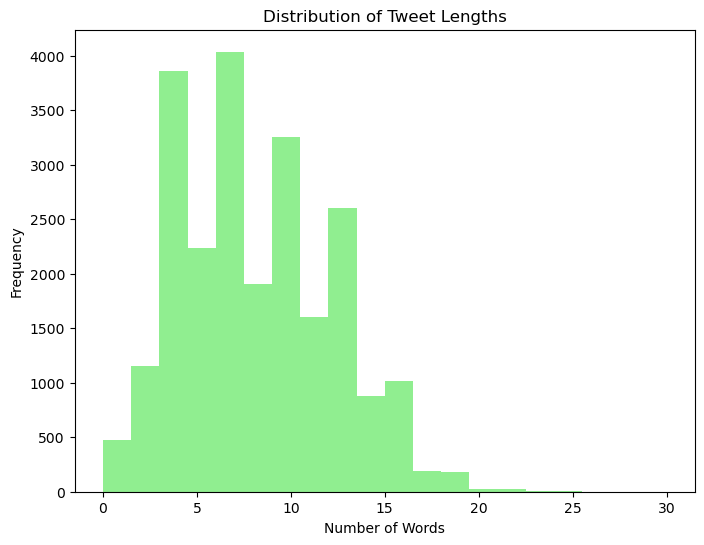

In [16]:
tweet_lengths = balanced_df['processed_tweet'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
plt.hist(tweet_lengths, bins=20, color='lightgreen')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


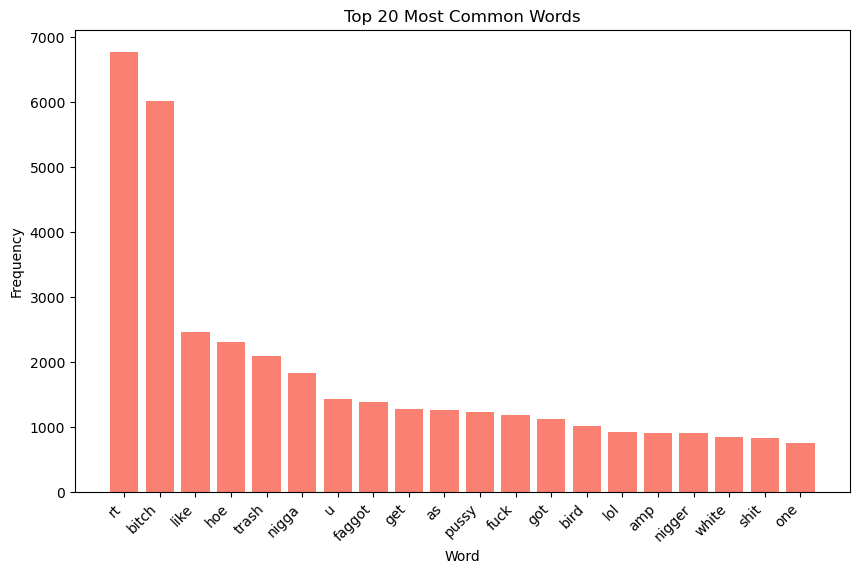

In [17]:
from collections import Counter

# Tokenize and count words
words = ' '.join(balanced_df['processed_tweet']).split()
word_counts = Counter(words)

# Plot the top N most common words
top_n = 20
top_words = word_counts.most_common(top_n)
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), [count for word, count in top_words], color='salmon')
plt.xticks(range(top_n), [word for word, count in top_words], rotation=45, ha='right')
plt.title(f'Top {top_n} Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


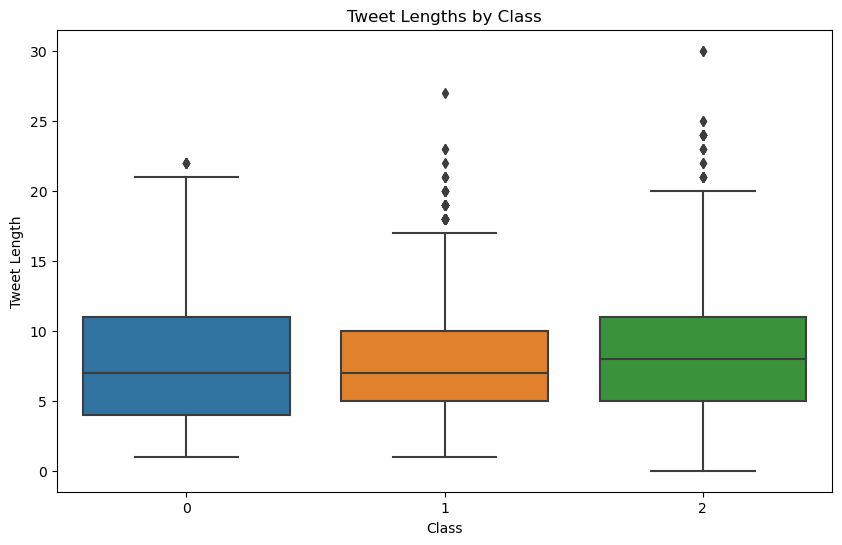

In [18]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y=tweet_lengths, data=balanced_df)
plt.title('Tweet Lengths by Class')
plt.xlabel('Class')
plt.ylabel('Tweet Length')
plt.show()


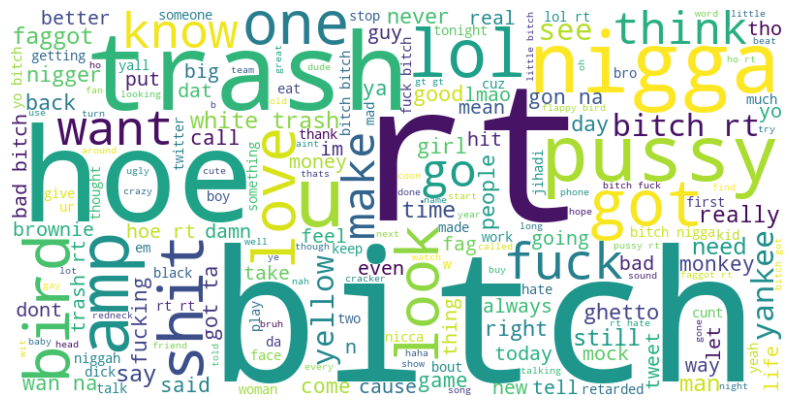

In [19]:
from wordcloud import WordCloud

# Concatenate all tweets into a single string
all_tweets = ' '.join(balanced_df['processed_tweet'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [20]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(balanced_df['processed_tweet']).toarray()
y = balanced_df['class']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=102)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Machine Learning Algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB()
}

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2136
           1       0.89      0.84      0.86      2413
           2       0.93      0.97      0.95      2494

    accuracy                           0.90      7043
   macro avg       0.89      0.89      0.89      7043
weighted avg       0.90      0.90      0.89      7043



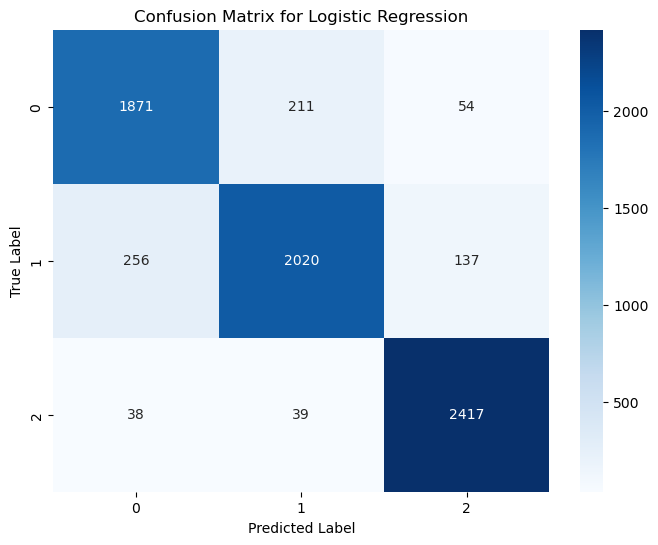

In [24]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2136
           1       0.99      0.89      0.94      2413
           2       0.95      0.99      0.97      2494

    accuracy                           0.96      7043
   macro avg       0.96      0.96      0.96      7043
weighted avg       0.96      0.96      0.96      7043



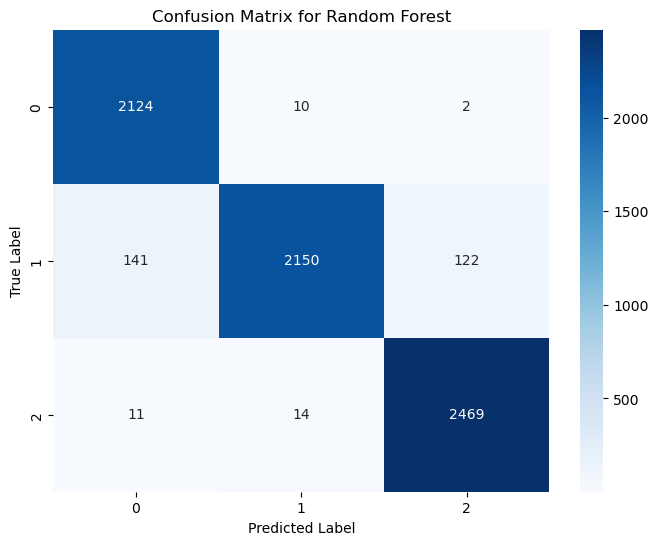

In [26]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svc = SVC(probability=True)  
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("Classification Report for Support Vector Machine:")
print(classification_report(y_test, y_pred_svc))


In [ ]:
# Confusion Matrix for SVM
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

In [ ]:
# ROC Curve for SVM
y_pred_svc_proba = svc.predict_proba(X_test)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_svc_proba[:, 1], pos_label=1)
roc_auc_svc = auc(fpr_svc, tpr_svc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='blue', lw=2, label=f'SVM (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Classification Report for Multinomial Naive Bayes:")
print(classification_report(y_test, y_pred_nb))


Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2136
           1       0.78      0.86      0.82      2413
           2       0.92      0.89      0.90      2494

    accuracy                           0.85      7043
   macro avg       0.85      0.84      0.85      7043
weighted avg       0.85      0.85      0.85      7043



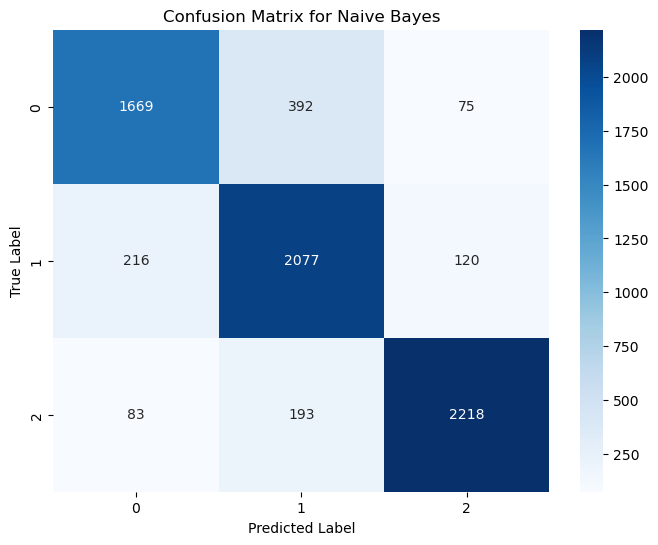

In [28]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


In [29]:
# Bagging Classifier
bagging = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)


In [30]:
# Classification report for Bagging Classifier
print("Classification Report for Bagging Classifier:")
print(classification_report(y_test, y_pred_bagging))

Classification Report for Bagging Classifier:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2136
           1       0.97      0.88      0.92      2413
           2       0.94      0.98      0.96      2494

    accuracy                           0.95      7043
   macro avg       0.95      0.95      0.95      7043
weighted avg       0.95      0.95      0.95      7043



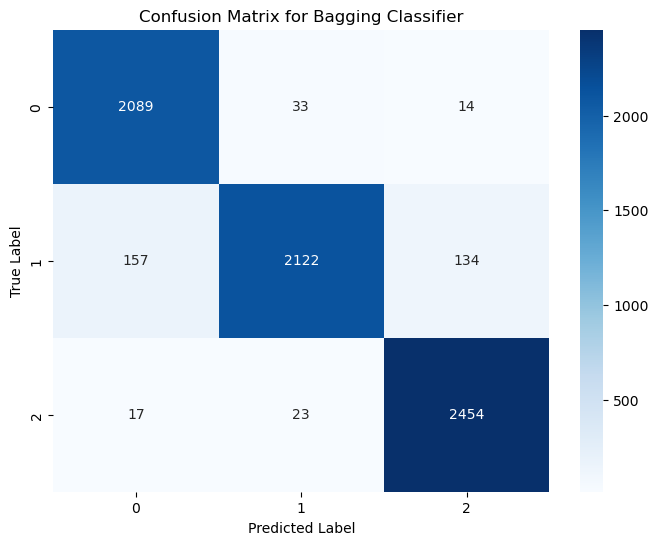

In [31]:
# Confusion Matrix for Bagging Classifier
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()

In [32]:
# AdaBoost Classifier
adaboost = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)

In [33]:
# Classification report for AdaBoost Classifier
print("Classification Report for AdaBoost Classifier:")
print(classification_report(y_test, y_pred_adaboost))

Classification Report for AdaBoost Classifier:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2136
           1       0.96      0.95      0.95      2413
           2       0.96      0.98      0.97      2494

    accuracy                           0.97      7043
   macro avg       0.97      0.97      0.97      7043
weighted avg       0.97      0.97      0.97      7043



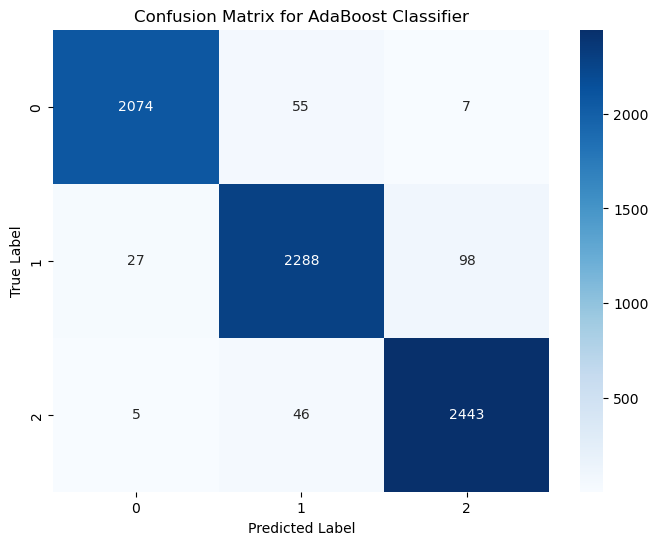

In [34]:
# Confusion Matrix for AdaBoost Classifier
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adaboost, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

In [38]:
# Voting Classifier
voting = VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('nb', MultinomialNB())], voting='soft')
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)

C:\Users\Ananya Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# Classification report for Voting Classifier
print("Classification Report for Voting Classifier:")
print(classification_report(y_test, y_pred_voting))

Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2136
           1       0.95      0.89      0.92      2413
           2       0.95      0.98      0.97      2494

    accuracy                           0.94      7043
   macro avg       0.94      0.94      0.94      7043
weighted avg       0.94      0.94      0.94      7043



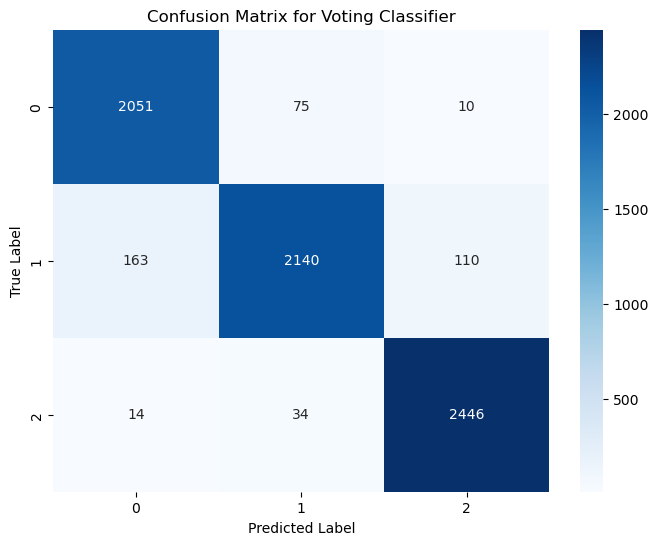

In [40]:
# Confusion Matrix for Voting Classifier
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()


# DEEP LEARNING




In [41]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [43]:
# Splitting the dataset
X = balanced_df['processed_tweet']
y = balanced_df['class']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=102)

In [44]:
# One-hot encoding
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)

In [45]:
# Tokenizer
max_words = 15000
max_len = 600

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

In [46]:

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping with patience and monitoring validation loss
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=0.0001)



In [47]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Define ANN model
ann_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Assuming 3 output classes
])


In [48]:
ann_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
print(ann_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 128)          1920000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1973763 (7.53 MB)
Trainable params: 1973763 (7.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [50]:
from sklearn.metrics import confusion_matrix, classification_report

# Train ANN model
ann_history = ann_model.fit(X_train_pad, y_train_encoded, validation_data=(X_val_pad, y_val_encoded),
                            epochs=15, batch_size=62, callbacks=[es, lr_reduction], verbose=1)


Epoch 1/15


266/266 [==============================] - 176s 630ms/step - loss: 0.5886 - accuracy: 0.7690 - val_loss: 0.3108 - val_accuracy: 0.8846 - lr: 0.0010
Epoch 2/15
266/266 [==============================] - 144s 542ms/step - loss: 0.2189 - accuracy: 0.9286 - val_loss: 0.2543 - val_accuracy: 0.9158 - lr: 0.0010
Epoch 3/15
266/266 [==============================] - 111s 416ms/step - loss: 0.1296 - accuracy: 0.9589 - val_loss: 0.2607 - val_accuracy: 0.9243 - lr: 0.0010
Epoch 4/15
266/266 [==============================] - 115s 433ms/step - loss: 0.0917 - accuracy: 0.9707 - val_loss: 0.2812 - val_accuracy: 0.9252 - lr: 0.0010
Epoch 5/15
266/266 [==============================] - ETA: 0s - loss: 0.0713 - accuracy: 0.9788
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
266/266 [==============================] - 121s 456ms/step - loss: 0.0713 - accuracy: 0.9788 - val_loss: 0.3205 - val_accuracy: 0.9225 - lr: 0.0010
Epoch 6/15
266/266 [=====================

In [51]:
# Predict probabilities for each class
y_pred_proba_ann = ann_model.predict(X_val_pad)

# Derive predicted classes
y_pred_ann = np.argmax(y_pred_proba_ann, axis=1)

# Predictions
#y_pred_ann = ann_model.predict_classes(X_val_pad)

# Confusion Matrix
conf_matrix_ann = confusion_matrix(y_val_encoded, y_pred_ann)

221/221 [==============================] - 12s 52ms/step


In [52]:
# Classification Report
class_report_ann = classification_report(y_val_encoded, y_pred_ann)

print("Confusion Matrix for ANN Model:")
print(conf_matrix_ann)
print("\nClassification Report for ANN Model:")
print(class_report_ann)


Confusion Matrix for ANN Model:
[[2021  109    6]
 [ 252 2050  111]
 [  50   65 2379]]

Classification Report for ANN Model:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2136
           1       0.92      0.85      0.88      2413
           2       0.95      0.95      0.95      2494

    accuracy                           0.92      7043
   macro avg       0.91      0.92      0.91      7043
weighted avg       0.92      0.92      0.92      7043



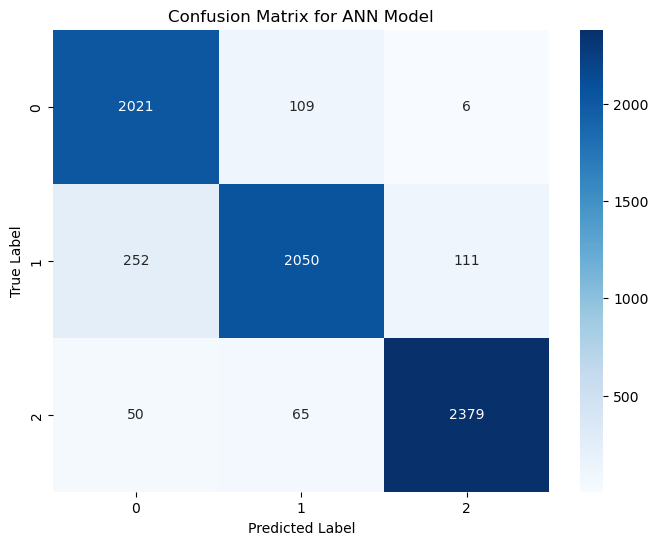

In [54]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for ANN Model')
plt.show()

In [55]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define CNN model
cnn_model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    Conv1D(32, 5, activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Assuming 3 output classes
])

cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [56]:

# Train CNN model
cnn_history = cnn_model.fit(X_train_pad, y_train_encoded, validation_data=(X_val_pad, y_val_encoded),
                            epochs=20, batch_size=64, callbacks=[es, lr_reduction], verbose=1)


Epoch 1/20
257/257 [==============================] - 7s 25ms/step - loss: 0.7311 - accuracy: 0.6539 - val_loss: 0.3625 - val_accuracy: 0.8637 - lr: 0.0010
Epoch 2/20
257/257 [==============================] - 6s 24ms/step - loss: 0.2651 - accuracy: 0.9062 - val_loss: 0.2552 - val_accuracy: 0.9107 - lr: 0.0010
Epoch 3/20
257/257 [==============================] - 6s 23ms/step - loss: 0.1352 - accuracy: 0.9596 - val_loss: 0.2170 - val_accuracy: 0.9279 - lr: 0.0010
Epoch 4/20
257/257 [==============================] - 6s 23ms/step - loss: 0.0791 - accuracy: 0.9768 - val_loss: 0.2421 - val_accuracy: 0.9323 - lr: 0.0010
Epoch 5/20
257/257 [==============================] - 6s 23ms/step - loss: 0.0500 - accuracy: 0.9867 - val_loss: 0.2646 - val_accuracy: 0.9303 - lr: 0.0010
Epoch 6/20
257/257 [==============================] - ETA: 0s - loss: 0.0350 - accuracy: 0.9904
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
257/257 [==============================] - 6s 2

In [58]:
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 32)           480000    
                                                                 
 conv1d (Conv1D)             (None, 596, 32)           5152      
                                                                 
 max_pooling1d (MaxPooling1  (None, 149, 32)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4768)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               610432    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

In [59]:
# Predict probabilities for each class
y_pred_proba_cnn = cnn_model.predict(X_val_pad)

# Derive predicted classes
y_pred_cnn = np.argmax(y_pred_proba_cnn, axis=1)

# Predictions
#y_pred_ann = ann_model.predict_classes(X_val_pad)

# Confusion Matrix
conf_matrix_cnn = confusion_matrix(y_val_encoded, y_pred_cnn)

221/221 [==============================] - 1s 4ms/step


In [60]:
# Classification Report
class_report_cnn = classification_report(y_val_encoded, y_pred_cnn)

print("Confusion Matrix for CNN Model:")
print(conf_matrix_ann)
print("\nClassification Report for CNN Model:")
print(class_report_cnn)


Confusion Matrix for CNN Model:
[[2021  109    6]
 [ 252 2050  111]
 [  50   65 2379]]

Classification Report for CNN Model:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2136
           1       0.91      0.89      0.90      2413
           2       0.95      0.97      0.96      2494

    accuracy                           0.93      7043
   macro avg       0.93      0.93      0.93      7043
weighted avg       0.93      0.93      0.93      7043



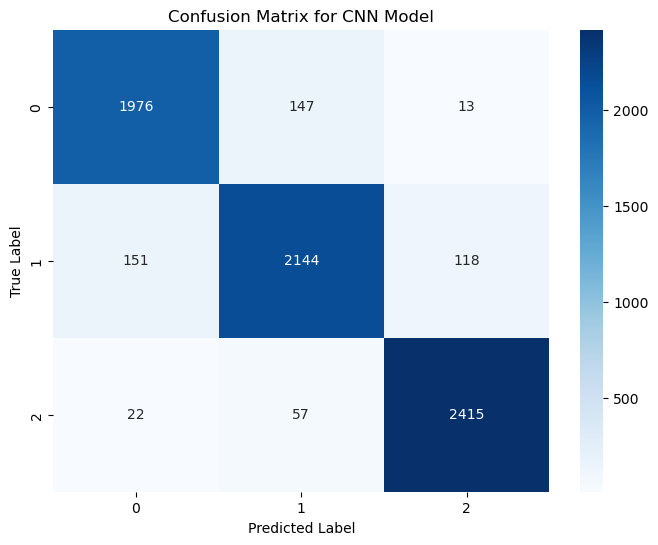

In [62]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CNN Model')
plt.show()

In [63]:
from keras.layers import LSTM
# Define LSTM model
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Assuming 3 output classes
])

In [64]:
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [65]:
# Train LSTM model
lstm_history = lstm_model.fit(X_train_pad, y_train_encoded, validation_data=(X_val_pad, y_val_encoded),
                              epochs=15, batch_size=62, callbacks=[es, lr_reduction], verbose=1)


Epoch 1/15
266/266 [==============================] - 90s 331ms/step - loss: 0.5222 - accuracy: 0.7979 - val_loss: 0.2896 - val_accuracy: 0.8971 - lr: 0.0010
Epoch 2/15
266/266 [==============================] - 83s 312ms/step - loss: 0.1831 - accuracy: 0.9387 - val_loss: 0.2466 - val_accuracy: 0.9201 - lr: 0.0010
Epoch 3/15
266/266 [==============================] - 78s 293ms/step - loss: 0.1104 - accuracy: 0.9635 - val_loss: 0.2577 - val_accuracy: 0.9205 - lr: 0.0010
Epoch 4/15
266/266 [==============================] - 77s 290ms/step - loss: 0.0878 - accuracy: 0.9737 - val_loss: 0.2627 - val_accuracy: 0.9256 - lr: 0.0010
Epoch 5/15
266/266 [==============================] - ETA: 0s - loss: 0.0620 - accuracy: 0.9808
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
266/266 [==============================] - 78s 293ms/step - loss: 0.0620 - accuracy: 0.9808 - val_loss: 0.3259 - val_accuracy: 0.9181 - lr: 0.0010
Epoch 6/15
266/266 [============================

In [67]:
# Predict probabilities for each class
y_pred_proba_lstm = lstm_model.predict(X_val_pad)

# Derive predicted classes
y_pred_lstm = np.argmax(y_pred_proba_lstm, axis=1)

# Predictions
#y_pred_ann = ann_model.predict_classes(X_val_pad)

# Confusion Matrix
conf_matrix_lstm = confusion_matrix(y_val_encoded, y_pred_lstm)

221/221 [==============================] - 11s 47ms/step


In [68]:
class_report_lstm = classification_report(y_val_encoded, y_pred_lstm)
print("Confusion Matrix for LSTM Model:")
print(conf_matrix_lstm)
print("\nClassification Report for LSTM Model:")
print(class_report_lstm)

Confusion Matrix for LSTM Model:
[[2029   96   11]
 [ 247 2068   98]
 [  36   75 2383]]

Classification Report for LSTM Model:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2136
           1       0.92      0.86      0.89      2413
           2       0.96      0.96      0.96      2494

    accuracy                           0.92      7043
   macro avg       0.92      0.92      0.92      7043
weighted avg       0.92      0.92      0.92      7043



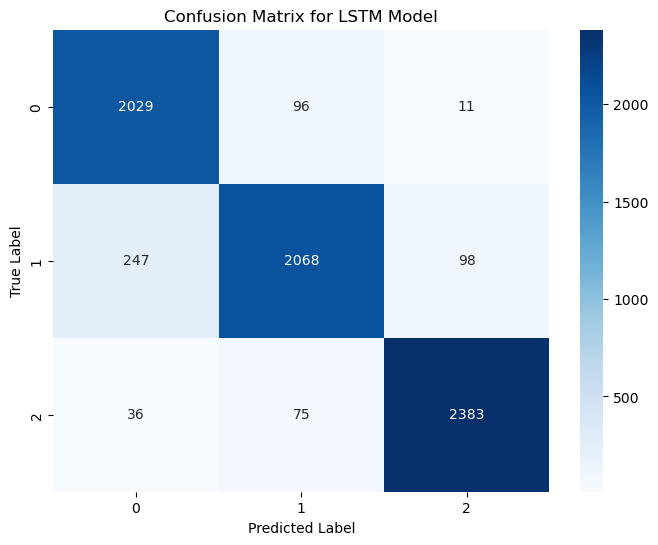

In [69]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lstm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LSTM Model')
plt.show()

In [70]:
from keras.layers import Bidirectional

# Define BiLSTM model
bilstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Assuming 3 output classes
])


In [71]:
bilstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [72]:
# Train BiLSTM model
bilstm_history = bilstm_model.fit(X_train_pad, y_train_encoded, validation_data=(X_val_pad, y_val_encoded),
                                  epochs=15, batch_size=62, callbacks=[es, lr_reduction], verbose=1)


Epoch 1/15
266/266 [==============================] - 163s 603ms/step - loss: 0.5169 - accuracy: 0.7898 - val_loss: 0.2812 - val_accuracy: 0.9009 - lr: 0.0010
Epoch 2/15
266/266 [==============================] - 164s 617ms/step - loss: 0.2069 - accuracy: 0.9276 - val_loss: 0.2506 - val_accuracy: 0.9118 - lr: 0.0010
Epoch 3/15
266/266 [==============================] - 166s 623ms/step - loss: 0.1120 - accuracy: 0.9618 - val_loss: 0.2467 - val_accuracy: 0.9235 - lr: 0.0010
Epoch 4/15
266/266 [==============================] - 167s 628ms/step - loss: 0.0771 - accuracy: 0.9751 - val_loss: 0.2685 - val_accuracy: 0.9273 - lr: 0.0010
Epoch 5/15
266/266 [==============================] - 166s 625ms/step - loss: 0.0621 - accuracy: 0.9801 - val_loss: 0.2804 - val_accuracy: 0.9238 - lr: 0.0010
Epoch 6/15
266/266 [==============================] - ETA: 0s - loss: 0.0507 - accuracy: 0.9842
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
266/266 [=======================

In [73]:
# Predict probabilities for each class
y_pred_proba_bilstm = bilstm_model.predict(X_val_pad)

# Derive predicted classes
y_pred_bilstm = np.argmax(y_pred_proba_bilstm, axis=1)

# Predictions
#y_pred_ann = ann_model.predict_classes(X_val_pad)

# Confusion Matrix
conf_matrix_bilstm = confusion_matrix(y_val_encoded, y_pred_bilstm)

221/221 [==============================] - 13s 56ms/step


In [74]:
class_report_bilstm = classification_report(y_val_encoded, y_pred_bilstm)
print("Confusion Matrix for BILSTM Model:")
print(conf_matrix_bilstm)
print("\nClassification Report for BILSTM Model:")
print(class_report_bilstm)

Confusion Matrix for BILSTM Model:
[[2046   82    8]
 [ 252 2058  103]
 [  30   64 2400]]

Classification Report for BILSTM Model:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2136
           1       0.93      0.85      0.89      2413
           2       0.96      0.96      0.96      2494

    accuracy                           0.92      7043
   macro avg       0.92      0.92      0.92      7043
weighted avg       0.92      0.92      0.92      7043



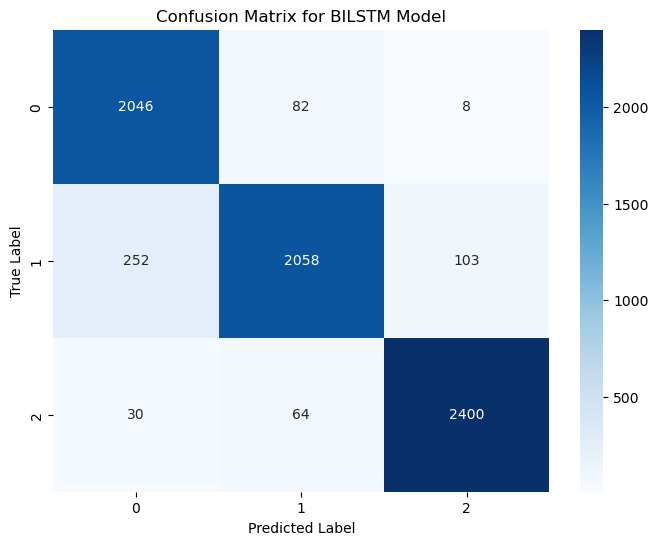

In [94]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bilstm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for BILSTM Model')
plt.show()

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [89]:
# Collecting evaluation metrics for all algorithms
models = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'Naive Bayes': y_pred_nb,
    'Bagging Classifier': y_pred_bagging,
    'AdaBoost Classifier': y_pred_adaboost,
    'ANN': y_pred_ann,
    'CNN': y_pred_cnn,
    'LSTM': y_pred_lstm,
    'BiLSTM': y_pred_bilstm
}

In [90]:
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

for model_name, y_pred in models.items():
    precision = precision_score(y_val_encoded, y_pred, average='weighted')
    recall = recall_score(y_val_encoded, y_pred, average='weighted')
    f1 = f1_score(y_val_encoded, y_pred, average='weighted')
    accuracy = accuracy_score(y_val_encoded, y_pred)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)


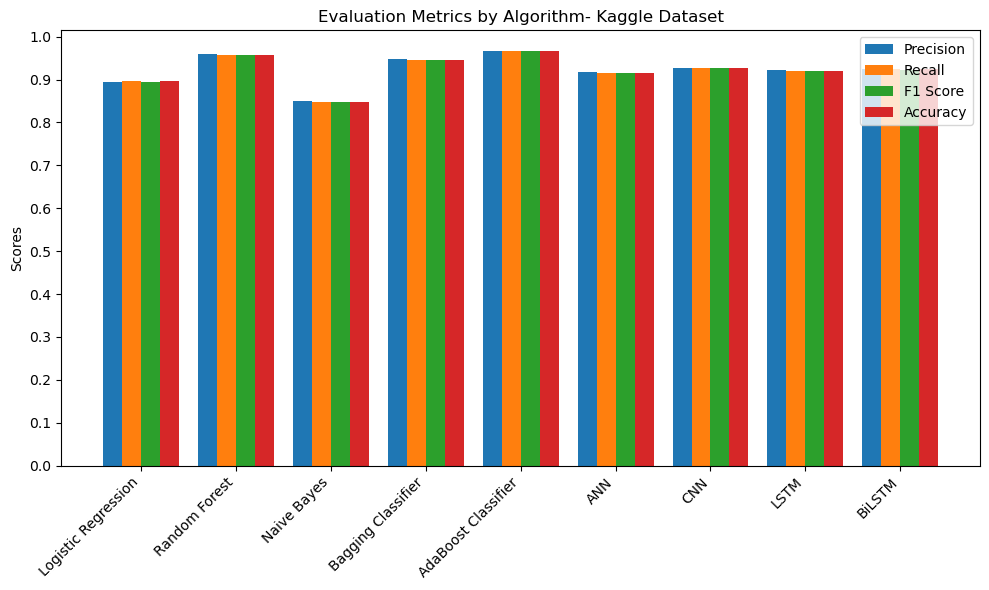

In [102]:
# Plotting the evaluation metrics
labels = list(models.keys())

x = np.arange(len(labels))
width = 0.2  

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, precision_scores, width, label='Precision')
rects2 = ax.bar(x - 0.5*width, recall_scores, width, label='Recall')
rects3 = ax.bar(x + 0.5*width, f1_scores, width, label='F1 Score')
rects4 = ax.bar(x + 1.5*width, accuracy_scores, width, label='Accuracy')

ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics by Algorithm- Kaggle Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
plt.yticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.show()

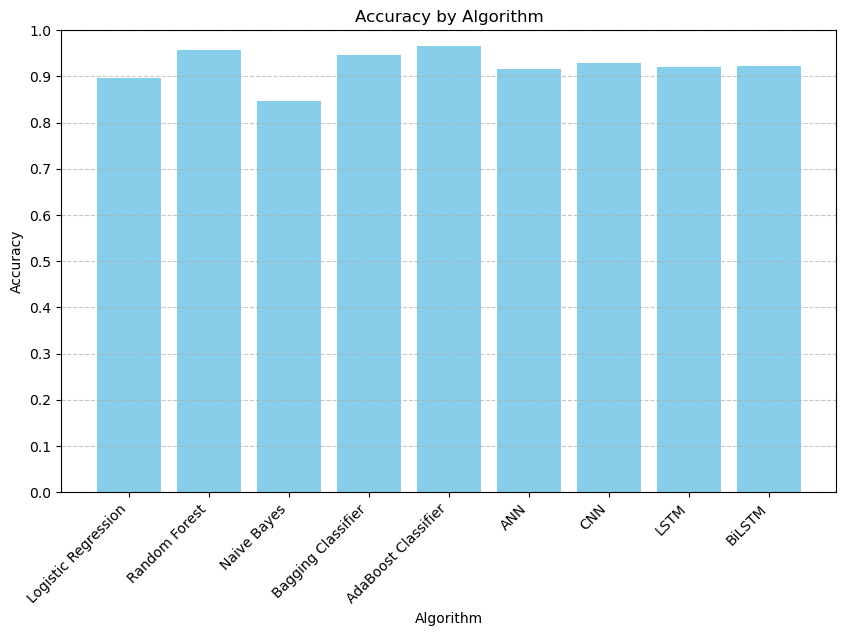

In [93]:
# Collecting accuracy scores for all algorithms
accuracy_scores = []

for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_val_encoded, y_pred)
    accuracy_scores.append(accuracy)

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracy_scores, color='skyblue')
plt.title('Accuracy by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.yticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks from 0 to 1 with a step of 0.1
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()


In [98]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
lemmatizer = WordNetLemmatizer()

# Function to preprocess the tweet
def preprocess_tweet(text):
    cleaned_text = re.sub(r'@[A-Za-z0-9_]+|https?://[A-Za-z0-9./]+|[^a-zA-Z]', ' ', text)
    cleaned_text = cleaned_text.lower()
    tokens = word_tokenize(cleaned_text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    processed_text = ' '.join(tokens)
    return processed_text

# Function to predict tweet class using ML and DL models
def predict_tweet_class(tweet):
    processed_tweet = preprocess_tweet(tweet)
    
    # TF-IDF vectorization
    processed_tweet_tfidf = tfidf_vectorizer.transform([processed_tweet]).toarray()
    
    # Tokenization and padding for DL models
    processed_tweet_seq = tokenizer.texts_to_sequences([processed_tweet])
    processed_tweet_pad = pad_sequences(processed_tweet_seq, maxlen=max_len)
    
    # Make predictions using ML models
    ml_predictions = {
        'Logistic Regression': lr.predict(processed_tweet_tfidf)[0],
        'Random Forest': rf.predict(processed_tweet_tfidf)[0],
        'Naive Bayes': nb.predict(processed_tweet_tfidf)[0],
        'Bagging': bagging.predict(processed_tweet_tfidf)[0],
        'AdaBoost': adaboost.predict(processed_tweet_tfidf)[0]
    }
    
    # Make predictions using DL models
    dl_predictions = {
        'LSTM': np.argmax(lstm_model.predict(processed_tweet_pad), axis=1)[0],
        'ANN': np.argmax(ann_model.predict(processed_tweet_pad), axis=1)[0],
        'CNN': np.argmax(cnn_model.predict(processed_tweet_pad), axis=1)[0],
        'BiLSTM': np.argmax(bilstm_model.predict(processed_tweet_pad), axis=1)[0]
    }
    
    # Combine predictions from all models
    all_predictions = list(ml_predictions.values()) + list(dl_predictions.values())
    
    # Determine the final prediction based on majority voting
    final_prediction = max(Counter(all_predictions), key=Counter(all_predictions).get)
    
    # Check if the predicted class is offensive or hate
    block_user = False
    if final_prediction in [0, 1]:
        block_user = True
        if final_prediction == 0:
            print("User blocked for posting hate content.")
        else:
            print("User blocked for posting offensive content.")


    return {
        'ML Predictions': ml_predictions,
        'DL Predictions': dl_predictions,
        'Final Prediction': final_prediction,
        'Block User': block_user
    }

# Example usage
user_tweet = input("Enter your tweet: ")
prediction_result = predict_tweet_class(user_tweet)
print("ML Predictions:", prediction_result['ML Predictions'])
print("DL Predictions:", prediction_result['DL Predictions'])
print("Final Prediction:", prediction_result['Final Prediction'])
print("Block User:", prediction_result['Block User'])


Enter your tweet: you are genius
1/1 [==============================] - 0s 37ms/step
ML Predictions: {'Logistic Regression': 2, 'Random Forest': 2, 'Naive Bayes': 2, 'Bagging': 2, 'AdaBoost': 1}
DL Predictions: {'LSTM': 2, 'ANN': 2, 'CNN': 2, 'BiLSTM': 2}
Final Prediction: 2
Block User: False
